<a href="https://colab.research.google.com/github/JayShekhavat/Web-scrapping-project-/blob/main/Numerical_Programming_Mid_Course_Summative_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement: Navigating the Data Science Job Landscape**

🚀 Unleash your creativity in crafting a solution that taps into the heartbeat of the data science job market! Envision an ingenious project that seamlessly wields cutting-edge web scraping techniques and illuminating data analysis.

🔍 Your mission? To engineer a tool that effortlessly gathers job listings from a multitude of online sources, extracting pivotal nuggets such as job descriptions, qualifications, locations, and salaries.

🧩 However, the true puzzle lies in deciphering this trove of data. Can your solution discern patterns that spotlight the most coveted skills? Are there threads connecting job types to compensation packages? How might it predict shifts in industry demand?

🎯 The core objectives of this challenge are as follows:

1. Web Scraping Mastery: Forge an adaptable and potent web scraping mechanism. Your creation should adeptly harvest data science job postings from a diverse array of online platforms. Be ready to navigate evolving website structures and process hefty data loads.

2. Data Symphony: Skillfully distill vital insights from the harvested job listings. Extract and cleanse critical information like job titles, company names, descriptions, qualifications, salaries, locations, and deadlines. Think data refinement and organization.

3. Market Wizardry: Conjure up analytical tools that conjure meaningful revelations from the gathered data. Dive into the abyss of job demand trends, geographic distribution, salary variations tied to experience and location, favored qualifications, and emerging skill demands.

4. Visual Magic: Weave a tapestry of visualization magic. Design captivating charts, graphs, and visual representations that paint a crystal-clear picture of the analyzed data. Make these visuals the compass that guides users through job market intricacies.

🌐 While the web scraping universe is yours to explore, consider these platforms as potential stomping grounds:

* LinkedIn Jobs
* Indeed
* Naukri
* Glassdoor
* AngelList

🎈 Your solution should not only decode the data science job realm but also empower professionals, job seekers, and recruiters to harness the dynamic shifts of the industry. The path is open, the challenge beckons – are you ready to embark on this exciting journey?








##**Modulary of code**

#**Scrapping the websites**

**Import libraries**

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



**Install the Request and beautifulSoup libraries**

In [89]:

! pip install requests

In [90]:
import requests
print(requests.__version__)


2.31.0


In [91]:
! pip install beautifulsoup4


#**Import libraries**

In [92]:
# Import the necessary libraries
import requests
from bs4 import BeautifulSoup
import re
import csv

#**Scrapping Movies Data**

In [93]:


# Define the URL of the webpage to be scraped
url = 'https://www.justwatch.com/in/movies?release_year_from=2000'

page=requests.get(url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Movie URL's**

In [94]:
# Finding all anchor elements with the specified class
anchor_elements = soup.find_all('a', class_='title-list-grid__item--link')

# Initializing an empty list to store the movie URLs
movie_urls = []

# Loop through each anchor element and extract the 'href' attribute
for anchor_element in anchor_elements:
  href_value = anchor_element.get('href')
  full_url = f'https://www.justwatch.com{href_value}'
  movie_urls.append(full_url)

# Printing the list of movie URLs
print(movie_urls)


['https://www.justwatch.com/in/movie/animal-2022', 'https://www.justwatch.com/in/movie/12th-fail', 'https://www.justwatch.com/in/movie/salaar', 'https://www.justwatch.com/in/movie/sam-bahadur', 'https://www.justwatch.com/in/movie/aquaman-and-the-lost-kingdom', 'https://www.justwatch.com/in/movie/tiger-3', 'https://www.justwatch.com/in/movie/nani30', 'https://www.justwatch.com/in/movie/oppenheimer', 'https://www.justwatch.com/in/movie/hanu-man', 'https://www.justwatch.com/in/movie/mission-impossible-7', 'https://www.justwatch.com/in/movie/dunki', 'https://www.justwatch.com/in/movie/killers-of-the-flower-moon', 'https://www.justwatch.com/in/movie/parking-2023', 'https://www.justwatch.com/in/movie/devil-2023', 'https://www.justwatch.com/in/movie/jawan', 'https://www.justwatch.com/in/movie/sapta-sagaradaache-ello-side-b', 'https://www.justwatch.com/in/movie/the-kerala-story', 'https://www.justwatch.com/in/movie/guthlee-ladoo', 'https://www.justwatch.com/in/movie/neru', 'https://www.justwat

## **Scrapping Movie Title**

In [95]:
# Initializing an empty list to store movie titles
movie_title = []

# Iterating through each anchor element in the list
for anchor_element in anchor_elements:
    # Extracting the movie title from the 'href' attribute of the anchor element
    name = anchor_element.get('href').split('/')[-1].strip()

    # Appending the movie title to the 'movie_title' list
    movie_title.append(name)

# Printing the list of movie titles
print(movie_title)

['animal-2022', '12th-fail', 'salaar', 'sam-bahadur', 'aquaman-and-the-lost-kingdom', 'tiger-3', 'nani30', 'oppenheimer', 'hanu-man', 'mission-impossible-7', 'dunki', 'killers-of-the-flower-moon', 'parking-2023', 'devil-2023', 'jawan', 'sapta-sagaradaache-ello-side-b', 'the-kerala-story', 'guthlee-ladoo', 'neru', 'barbie-2023', 'society-of-the-snow', 'lift-0', 'the-marvels', 'anatomie-dune-chute', 'fighter-2022', 'kaathal-the-core', 'the-beekeeper-2024', 'anyone-but-you', 'poor-things', 'saltburn', 'ssmb-28', 'migration', 'talk-to-me-2022', 'napoleon-2023', 'mangalavaram', 'past-lives', 'joram', 'leo-2023', 'the-family-plan', 'saindhav', 'merry-christmas-2024', 'kho-gaye-hum-kahan', 'harry-potter-and-the-philosophers-stone', 'interstellar', 'joe-2023', 'chittha', 'the-holdovers', 'jigarthanda-doublex', '777-charlie', 'rocky-aur-rani-ki-prem-kahani', 'dada-2023', 'mad-max-fury-road', '365-days', 'three-of-us', 'extra', 'zara-hatke-zara-bach-ke', 'wonka', 'role-play-2023', 'antony-2023',

## **Scrapping release Year**

In [96]:
# Initializing an empty list to store release years
release_year = []

# Iterating through each movie URL
for url in movie_urls:
    # Fetching the webpage content
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')

    # Finding the span element with class 'text-muted'
    year = soup.find('span', class_='text-muted')

    # Extracting the release year using string manipulation
    # If 'year' is not found, assign 'NA' as the default value
    release_year.append(year.text.split("(")[-1].split(")")[0] if year else 'NA')

# Printing the list of release years
print(release_year)

['2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2024', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2024', '2023', '2023', '2024', '2023', '2024', '2023', '2023', '2023', '2024', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2024', '2024', '2023', '2001', '2014', '2023', '2023', '2023', '2023', '2022', '2023', '2023', '2015', '2020', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2013', '2023', '2023', '2010', '2023', '2023', '2023', '2018', '2019', '2023', '2022', '2023', '2024', '2023', '2023', '2023', '2019', '2023', '2021', '2005', '2024', '2008', '2023', '2018', '2017', '2021', '2024', '2023', '2023', '2023', '2017', '2023', '2018', '2022', '2020', '2006', '2023', '2022', '2019']


## **Scrapping Genres**

In [97]:
# Initializing an empty list to store movie genres
movie_genres = []

# Iterating through each movie URL
for url in movie_urls:
    # Fetching the webpage content
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')

    # Finding the h3 element with class 'detail-infos__subheading' and text 'Genres'
    heading = soup.find('h3', class_='detail-infos__subheading', string='Genres')

    # Extracting the text of the next sibling div element with class 'detail-infos__value'
    genre_value = heading.find_next_sibling('div', class_='detail-infos__value').text.strip()

    # Appending the extracted genre to the list
    movie_genres.append(genre_value)

# Printing the list of movie genres
print(movie_genres)

['Action & Adventure, Drama, Crime, Mystery & Thriller', 'Drama', 'Action & Adventure, Crime, Drama, Mystery & Thriller', 'War & Military, Drama, History', 'Action & Adventure, Fantasy, Science-Fiction', 'Action & Adventure, Mystery & Thriller', 'Drama, Kids & Family, Romance', 'Drama, History', 'Fantasy, Action & Adventure, Comedy, Science-Fiction', 'Action & Adventure, Mystery & Thriller', 'Comedy, Drama', 'Crime, History, Drama, Romance, Western', 'Mystery & Thriller, Drama', 'Mystery & Thriller, Action & Adventure, Drama', 'Mystery & Thriller, Action & Adventure', 'Romance, Drama', 'Drama', 'Drama', 'Drama, Mystery & Thriller', 'Fantasy, Comedy', 'Drama, History, Mystery & Thriller', 'Crime, Mystery & Thriller, Action & Adventure, Comedy, Drama', 'Action & Adventure, Science-Fiction, Fantasy', 'Drama, Mystery & Thriller, Crime', 'Mystery & Thriller, Action & Adventure, War & Military', 'Drama, Crime', 'Action & Adventure, Mystery & Thriller, Drama', 'Comedy, Romance', 'Comedy, Scie

## **scrapping IMBD Rating**

In [98]:
# Initializing a dictionary to store rating values for each movie URL
ratings = {}

# Iterating through each movie URL
for url in movie_urls:
    # Fetching the webpage content
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')

    # Finding all div elements with class 'detail-infos'
    details_divs = soup.find_all('div', class_='detail-infos')

    # Default value for rating in case it's not found
    rating_value = 'NA'

    # Iterating through each 'detail-infos' div
    for detail_div in details_divs:
        # Finding the h3 element with class 'detail-infos__subheading'
        subheading = detail_div.find('h3', class_='detail-infos__subheading')

        # Checking if the subheading contains the text 'Rating'
        if subheading and 'Rating' in subheading.text:
            # Finding the next div with class 'detail-infos__value'
            rating_div = detail_div.find('div', class_='detail-infos__value')

            # Checking if the rating_div is found
            if rating_div:
                # Extracting the rating value
                rating_value = rating_div.text.strip()

    # Storing the rating value in the dictionary with the movie URL as the key
    ratings[url] = rating_value

# Print the dictionary containing rating values for each movie URL
print(ratings)


{'https://www.justwatch.com/in/movie/animal-2022': '6.4  (76k)', 'https://www.justwatch.com/in/movie/12th-fail': '9.2  (90k)', 'https://www.justwatch.com/in/movie/salaar': '6.6  (56k)', 'https://www.justwatch.com/in/movie/sam-bahadur': '7.9  (11k)', 'https://www.justwatch.com/in/movie/aquaman-and-the-lost-kingdom': '5.7  (49k)', 'https://www.justwatch.com/in/movie/tiger-3': '6.0  (51k)', 'https://www.justwatch.com/in/movie/nani30': '8.3  (11k)', 'https://www.justwatch.com/in/movie/oppenheimer': '8.4  (624k)', 'https://www.justwatch.com/in/movie/hanu-man': '8.5  (16k)', 'https://www.justwatch.com/in/movie/mission-impossible-7': '7.7  (220k)', 'https://www.justwatch.com/in/movie/dunki': '7.2  (62k)', 'https://www.justwatch.com/in/movie/killers-of-the-flower-moon': '7.7  (191k)', 'https://www.justwatch.com/in/movie/parking-2023': '7.9  (8k)', 'https://www.justwatch.com/in/movie/devil-2023': '6.7  (2k)', 'https://www.justwatch.com/in/movie/jawan': '7.0  (90k)', 'https://www.justwatch.com/i

In [99]:
# Initializing an empty list to store IMDb ratings
imdb_ratings = []

# Iterate through each value in the 'ratings' dictionary
for rating in ratings.values():
    # Check if the rating is not 'NA'
    if rating != 'NA':
        # Split the rating string and append the IMDb rating part to the list
        imdb_ratings.append(rating.split(' ')[0])
    else:
        # If the rating is 'NA', append it directly to the list
        imdb_ratings.append(rating)

# Print the list of IMDb ratings
print(imdb_ratings)

['6.4', '9.2', '6.6', '7.9', '5.7', '6.0', '8.3', '8.4', '8.5', '7.7', '7.2', '7.7', '7.9', '6.7', '7.0', '8.1', '7.2', '7.7', '7.7', '6.9', '7.9', '5.5', '', '7.8', '7.8', '7.6', '6.5', '6.7', '8.4', '7.1', '6.2', '6.7', '7.1', '6.4', '6.7', '7.9', '6.9', '7.2', '6.3', '5.3', '7.9', '7.7', '7.6', '8.7', '7.7', '8.3', 'NA', '8.1', '8.8', '6.6', '8.2', '8.1', '3.3', '7.6', '5.2', '6.4', '7.2', '5.4', '6.8', '6.0', '3.6', '8.2', '5.2', '5.3', '8.8', '8.4', '6.0', '6.8', '6.8', '8.4', '6.9', '7.8', '7.4', '6.0', '7.7', '6.1', '8.3', '8.2', '5.8', '8.0', '8.2', '7.3', '9.0', '6.2', '8.2', '7.8', '7.6', '6.4', '5.9', '7.9', '6.7', '8.0', '8.6', '8.5', '8.3', '7.3', '8.0', '7.3', '8.3', '6.1']


## **Scrapping Runtime/Duration**

In [100]:
# Initializing a dictionary to store runtime values for each movie URL
runtime = {}

# Iterating through each movie URL
for url in movie_urls:
    # Fetching the webpage content
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')

    # Finding all div elements with class 'detail-infos'
    details_divs = soup.find_all('div', class_='detail-infos')

    # Default value for runtime in case it's not found
    runtime_value = 'NA'

    # Iterating through each 'detail-infos' div
    for detail_div in details_divs:
        # Finding the h3 element with class 'detail-infos__subheading'
        subheading = detail_div.find('h3', class_='detail-infos__subheading')

        # Checking if the subheading contains the text 'Runtime'
        if subheading and 'Runtime' in subheading.text:
            # Finding the next div with class 'detail-infos__value'
            runtime_div = detail_div.find('div', class_='detail-infos__value')

            # Checking if the runtime_div is found
            if runtime_div:
                # Extracting the runtime value
                runtime_value = runtime_div.text.strip()

    # Storing the runtime value in the dictionary with the movie URL as the key
    runtime[url] = runtime_value

# Print the dictionary containing runtime values for each movie URL
print(runtime)

{'https://www.justwatch.com/in/movie/animal-2022': '3h 21min', 'https://www.justwatch.com/in/movie/12th-fail': '2h 26min', 'https://www.justwatch.com/in/movie/salaar': '2h 55min', 'https://www.justwatch.com/in/movie/sam-bahadur': '2h 30min', 'https://www.justwatch.com/in/movie/aquaman-and-the-lost-kingdom': '2h 4min', 'https://www.justwatch.com/in/movie/tiger-3': '2h 35min', 'https://www.justwatch.com/in/movie/nani30': '2h 35min', 'https://www.justwatch.com/in/movie/oppenheimer': '3h 1min', 'https://www.justwatch.com/in/movie/hanu-man': '2h 39min', 'https://www.justwatch.com/in/movie/mission-impossible-7': '2h 44min', 'https://www.justwatch.com/in/movie/dunki': '2h 40min', 'https://www.justwatch.com/in/movie/killers-of-the-flower-moon': '3h 26min', 'https://www.justwatch.com/in/movie/parking-2023': '2h 7min', 'https://www.justwatch.com/in/movie/devil-2023': '2h 24min', 'https://www.justwatch.com/in/movie/jawan': '2h 49min', 'https://www.justwatch.com/in/movie/sapta-sagaradaache-ello-si

In [101]:
# Initializing an empty list to store duration values
duration = []

# Iterate through each value in the 'runtime' dictionary
for time in runtime.values():
    # Append the runtime value to the 'duration' list
    duration.append(time)

# Print the list of duration values
print(duration)

['3h 21min', '2h 26min', '2h 55min', '2h 30min', '2h 4min', '2h 35min', '2h 35min', '3h 1min', '2h 39min', '2h 44min', '2h 40min', '3h 26min', '2h 7min', '2h 24min', '2h 49min', '2h 28min', '2h 18min', '1h 45min', '2h 30min', '1h 54min', '2h 24min', '1h 46min', '1h 45min', '2h 32min', '2h 47min', '1h 52min', '1h 45min', '1h 43min', '2h 21min', '2h 11min', '2h 39min', '1h 23min', '1h 35min', '2h 38min', '2h 25min', '1h 46min', '1h 57min', '2h 43min', '1h 59min', '2h 18min', '2h 24min', '2h 15min', '2h 32min', '2h 49min', '2h 27min', '2h 20min', '2h 13min', '2h 52min', '2h 46min', '2h 48min', '2h 15min', '2h 1min', '1h 54min', '1h 39min', '2h 35min', '2h 20min', '1h 57min', '1h 41min', '2h 27min', '2h 8min', '2h 26min', '3h 0min', '2h 48min', '1h 52min', '2h 28min', '2h 38min', '1h 59min', '2h 14min', '2h 23min', '2h 2min', '1h 45min', '2h 55min', '2h 33min', '1h 49min', '1h 54min', '2h 28min', '2h 5min', '2h 18min', '2h 22min', '2h 35min', '2h 20min', '2h 37min', '2h 32min', '2h 4min', 

## **Scrapping Age Rating**

In [102]:
# Initializing a dictionary to store age criteria for each movie URL
age_criteria = {}

# Iterating through each movie URL
for url in movie_urls:
    # Fetching the webpage content
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')

    # Finding all div elements with class 'detail-infos'
    details_divs = soup.find_all('div', class_='detail-infos')

    # Default value for age_rating in case it's not found
    age_rating = 'NA'

    # Iterating through each 'detail-infos' div
    for detail_div in details_divs:
        # Finding the h3 element with class 'detail-infos__subheading'
        subheading = detail_div.find('h3', class_='detail-infos__subheading')

        # Checking if the subheading contains the text 'Age Rating'
        if subheading and 'Age rating' in subheading.text:
            # Finding the next div with class 'detail-infos__value'
            age_rating_div = detail_div.find('div', class_='detail-infos__value')

            # Checking if the age_rating_div is found
            if age_rating_div:
                # Extracting the age rating value
                age_rating = age_rating_div.text.strip()

    # Storing the age rating value in the dictionary with the movie URL as the key
    age_criteria[url] =age_rating

# Print the dictionary containing age_rating_value values for each movie URL
print(age_criteria)

{'https://www.justwatch.com/in/movie/animal-2022': 'A', 'https://www.justwatch.com/in/movie/12th-fail': 'NA', 'https://www.justwatch.com/in/movie/salaar': 'A', 'https://www.justwatch.com/in/movie/sam-bahadur': 'UA', 'https://www.justwatch.com/in/movie/aquaman-and-the-lost-kingdom': 'NA', 'https://www.justwatch.com/in/movie/tiger-3': 'NA', 'https://www.justwatch.com/in/movie/nani30': 'U', 'https://www.justwatch.com/in/movie/oppenheimer': 'UA', 'https://www.justwatch.com/in/movie/hanu-man': 'UA', 'https://www.justwatch.com/in/movie/mission-impossible-7': 'NA', 'https://www.justwatch.com/in/movie/dunki': 'NA', 'https://www.justwatch.com/in/movie/killers-of-the-flower-moon': 'A', 'https://www.justwatch.com/in/movie/parking-2023': 'UA', 'https://www.justwatch.com/in/movie/devil-2023': 'NA', 'https://www.justwatch.com/in/movie/jawan': 'UA', 'https://www.justwatch.com/in/movie/sapta-sagaradaache-ello-side-b': 'UA', 'https://www.justwatch.com/in/movie/the-kerala-story': 'A', 'https://www.justw

In [103]:
# Create a list comprehension to extract values from the 'age_criteria' dictionary
age_rating = [rating for rating in age_criteria.values()]

# Print the list of age ratings
print(age_rating)

['A', 'NA', 'A', 'UA', 'NA', 'NA', 'U', 'UA', 'UA', 'NA', 'NA', 'A', 'UA', 'NA', 'UA', 'UA', 'A', 'NA', 'UA', 'UA', 'NA', 'NA', 'NA', 'NA', 'UA', 'UA', 'NA', 'NA', 'NA', 'NA', 'UA', 'NA', 'NA', 'NA', 'NA', 'UA', 'UA', 'UA', 'A', 'UA', 'UA', 'NA', 'U', 'NA', 'NA', 'UA', 'NA', 'UA', 'UA', 'NA', 'U', 'A', 'NA', 'NA', 'NA', 'UA', 'U', 'NA', 'NA', 'NA', 'UA', 'A', 'UA', 'NA', 'UA', 'UA', 'A', 'NA', 'UA', 'A', 'NA', 'UA', 'NA', 'NA', 'UA', 'UA', 'NA', 'UA', 'UA', 'UA', 'NA', 'UA', 'NA', 'UA', 'UA', 'UA', 'UA', 'U', 'NA', 'NA', 'A', 'A', 'UA', 'U', 'UA', 'UA', 'A', 'NA', 'UA', 'NA']


## **Fetching Production Countries Details**

In [104]:
# Initializing a dictionary to store production_country for each movie URL
production_country = {}

# Iterating through each movie URL
for url in movie_urls:
    # Fetching the webpage content
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')

    # Finding all div elements with class 'detail-infos'
    details_divs = soup.find_all('div', class_='detail-infos')

    # Default value for production country in case it's not found
    country = 'NA'

    # Iterating through each 'detail-infos' div
    for detail_div in details_divs:
        # Finding the h3 element with class 'detail-infos__subheading'
        subheading = detail_div.find('h3', class_='detail-infos__subheading')

        # Checking if the subheading contains the text 'Production country'
        if subheading and 'Production country' in subheading.text:
            # Finding the next div with class 'detail-infos__value'
            country_div = detail_div.find('div', class_='detail-infos__value')

            # Checking if the country_div is found
            if country_div:
                # Extracting the country name
                country = country_div .text.strip()

    # Storing the country name  in the dictionary with the movie URL as the key
    production_country[url] =country

# Print the dictionary containing counry for each movie URL
print(production_country)

{'https://www.justwatch.com/in/movie/animal-2022': 'India', 'https://www.justwatch.com/in/movie/12th-fail': 'India', 'https://www.justwatch.com/in/movie/salaar': 'India', 'https://www.justwatch.com/in/movie/sam-bahadur': 'India', 'https://www.justwatch.com/in/movie/aquaman-and-the-lost-kingdom': 'United States', 'https://www.justwatch.com/in/movie/tiger-3': 'India', 'https://www.justwatch.com/in/movie/nani30': 'India', 'https://www.justwatch.com/in/movie/oppenheimer': 'United Kingdom, United States', 'https://www.justwatch.com/in/movie/hanu-man': 'India', 'https://www.justwatch.com/in/movie/mission-impossible-7': 'United States', 'https://www.justwatch.com/in/movie/dunki': 'India', 'https://www.justwatch.com/in/movie/killers-of-the-flower-moon': 'United States', 'https://www.justwatch.com/in/movie/parking-2023': 'India', 'https://www.justwatch.com/in/movie/devil-2023': 'India', 'https://www.justwatch.com/in/movie/jawan': 'India', 'https://www.justwatch.com/in/movie/sapta-sagaradaache-e

In [105]:
# Create a list comprehension to extract values from the production country dictionary
Production_country=[country for country in production_country.values()]
# Print the list of Production country
print(Production_country)

['India', 'India', 'India', 'India', 'United States', 'India', 'India', 'United Kingdom, United States', 'India', 'United States', 'India', 'United States', 'India', 'India', 'India', 'India', 'India', 'India', 'India', 'United Kingdom, United States', 'Spain, United States', 'United States', 'United States', 'France', 'India', 'India', 'United Kingdom, United States', 'United States, Australia', 'United Kingdom, United States, Ireland', 'United Kingdom, United States', 'India', 'Canada, France, United States', 'United Kingdom, Australia', 'United States, United Kingdom', 'India', 'South Korea, United States', 'India', 'India', 'United States', 'India', 'India', 'India', 'United Kingdom, United States', 'United Kingdom, United States', 'India', 'India', 'United States', 'India', 'India', 'India', 'India', 'Australia, United States', 'Poland', 'India', 'India', 'India', 'United Kingdom, United States', 'United States, France, Germany', 'India', 'United States', 'India', 'United States',

## **Fetching Streaming Service Details**

In [106]:
# Initializing an empty list to store streaming platform names
streaming_platform = []

# Iterating through each movie URL
for url in movie_urls:
    # Fetching the webpage content
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')

    # Finding the img element with class 'offer__icon'
    platform = soup.find('img', class_='offer__icon')

    # Checking if the platform element is found
    if platform:
        # Extracting the 'alt' attribute, which contains the platform name
        platform_name = platform['alt']
    else:
        # Setting platform_name to 'NA' if the platform element is not found
        platform_name = "NA"

    # Handling the specific case where the platform_name is 'Bookmyshow'
    # Appending 'NA' to the list in this case
    if platform_name == 'Bookmyshow':
        streaming_platform.append('NA')
    else:
        # Appending the platform_name to the list
        streaming_platform.append(platform_name)

# Print the list of streaming platform names
print(streaming_platform)

['Netflix', 'Hotstar', 'Netflix', 'Zee5', 'Apple TV', 'Amazon Prime Video', 'Netflix', 'Apple TV', 'NA', 'Apple TV', 'NA', 'Apple TV Plus', 'NA', 'Amazon Prime Video', 'Apple TV', 'Amazon Prime Video', 'NA', 'Amazon Prime Video', 'Hotstar', 'Apple TV', 'Netflix', 'Netflix', 'Apple TV', 'NA', 'NA', 'Amazon Prime Video', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'Apple TV', 'Apple TV', 'NA', 'Lionsgate Play', 'Amazon Video', 'Netflix', 'Apple TV Plus', 'Amazon Prime Video', 'NA', 'Netflix', 'Apple TV', 'Apple TV', 'NA', 'Hotstar', 'NA', 'Netflix', 'Voot', 'Amazon Prime Video', 'Amazon Prime Video', 'Apple TV', 'Netflix', 'Netflix', 'NA', 'NA', 'Apple TV', 'Amazon Prime Video', 'Amazon Prime Video', 'Apple TV', 'NA', 'Lionsgate Play', 'Zee5', 'NA', 'Apple TV', 'Amazon Prime Video', 'Netflix', 'Apple TV', 'Apple TV', 'Apple TV', 'Apple TV', 'Apple TV', 'Sony Liv', 'Netflix', 'Amazon Prime Video', 'NA', 'NA', 'Zee5', 'Apple TV', 'Apple TV', 'Apple TV', 'NA', 'Apple TV', 'Amazon Prime Video', 'App

## **Now Creating Movies DataFrame**

In [107]:
# Creating a dictionary with keys as column names and values as lists
movie_data = {
                'Title': movie_title,
                'Release_year': release_year,
                'Genre': movie_genres,
                'IMDB_Rating': imdb_ratings,
                'Age_rating': age_rating,
                'Duration': duration,
                'Production_country': Production_country,
                'Streaming_service': streaming_platform,
                'URL': movie_urls
              }

# Creating a DataFrame using the dictionary
movie_df = pd.DataFrame(movie_data)

In [108]:
#head of dataframe
movie_df.head(10)

,Title,Release_year,Genre,IMDB_Rating,Age_rating,Duration,Production_country,Streaming_service,URL
0,animal-2022,2023,"Action & Adventure, Drama, Crime, Mystery & Th...",6.4,A,3h 21min,India,Netflix,https://www.justwatch.com/in/movie/animal-2022
1,12th-fail,2023,Drama,9.2,NA,2h 26min,India,Hotstar,https://www.justwatch.com/in/movie/12th-fail
2,salaar,2023,"Action & Adventure, Crime, Drama, Mystery & Th...",6.6,A,2h 55min,India,Netflix,https://www.justwatch.com/in/movie/salaar
3,sam-bahadur,2023,"War & Military, Drama, History",7.9,UA,2h 30min,India,Zee5,https://www.justwatch.com/in/movie/sam-bahadur
4,aquaman-and-the-lost-kingdom,2023,"Action & Adventure, Fantasy, Science-Fiction",5.7,NA,2h 4min,United States,Apple TV,https://www.justwatch.com/in/movie/aquaman-and...
5,tiger-3,2023,"Action & Adventure, Mystery & Thriller",6.0,NA,2h 35min,India,Amazon Prime Video,https://www.justwatch.com/in/movie/tiger-3
6,nani30,2023,"Drama, Kids & Family, Romance",8.3,U,2h 35min,India,Netflix,https://www.justwatch.com/in/movie/nani30
7,oppenheimer,2023,"Drama, History",8.4,UA,3h 1min,"United Kingdom, United States",Apple TV,https://www.justwatch.com/in/movie/oppenheimer
8,hanu-man,2024,"Fantasy, Action & Adventure, Comedy, Science-F...",8.5,UA,2h 39min,India,NA,https://www.justwatch.com/in/movie/hanu-man
9,mission-impossible-7,2023,"Action & Adventure, Mystery & Thriller",7.7,NA,2h 44min,United States,Apple TV,https://www.justwatch.com/in/movie/mission-imp...


In [109]:
# Adding a new column 'Type' to the DataFrame with constant value 'Movie'
movie_df['Type'] = 'Movie'

In [110]:
#head of dataframe
movie_df.head()

,Title,Release_year,Genre,IMDB_Rating,Age_rating,Duration,Production_country,Streaming_service,URL,Type
0,animal-2022,2023,"Action & Adventure, Drama, Crime, Mystery & Th...",6.4,A,3h 21min,India,Netflix,https://www.justwatch.com/in/movie/animal-2022,Movie
1,12th-fail,2023,Drama,9.2,NA,2h 26min,India,Hotstar,https://www.justwatch.com/in/movie/12th-fail,Movie
2,salaar,2023,"Action & Adventure, Crime, Drama, Mystery & Th...",6.6,A,2h 55min,India,Netflix,https://www.justwatch.com/in/movie/salaar,Movie
3,sam-bahadur,2023,"War & Military, Drama, History",7.9,UA,2h 30min,India,Zee5,https://www.justwatch.com/in/movie/sam-bahadur,Movie
4,aquaman-and-the-lost-kingdom,2023,"Action & Adventure, Fantasy, Science-Fiction",5.7,NA,2h 4min,United States,Apple TV,https://www.justwatch.com/in/movie/aquaman-and...,Movie


In [111]:
#shape of data
movie_df.shape

(100, 10)

In [112]:
#shape of data
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Title               100 non-null    object
 1   Release_year        100 non-null    object
 2   Genre               100 non-null    object
 3   IMDB_Rating         100 non-null    object
 4   Age_rating          100 non-null    object
 5   Duration            100 non-null    object
 6   Production_country  100 non-null    object
 7   Streaming_service   100 non-null    object
 8   URL                 100 non-null    object
 9   Type                100 non-null    object
dtypes: object(10)
memory usage: 7.9+ KB


In [26]:
#converting release year to date format
movie_df['Release_year'] = pd.to_datetime(movie_df['Release_year'], format='%Y').dt.year

In [113]:
movie_df.head(2)

,Title,Release_year,Genre,IMDB_Rating,Age_rating,Duration,Production_country,Streaming_service,URL,Type
0,animal-2022,2023,"Action & Adventure, Drama, Crime, Mystery & Th...",6.4,A,3h 21min,India,Netflix,https://www.justwatch.com/in/movie/animal-2022,Movie
1,12th-fail,2023,Drama,9.2,NA,2h 26min,India,Hotstar,https://www.justwatch.com/in/movie/12th-fail,Movie


In [114]:
movie_df = movie_df.replace(r'^\s*$', np.nan, regex=True)

In [147]:
# Replace 'NA' with NaN (Not a Number)
movie_df['IMDB_Rating'].replace('NA', float('nan'), inplace=True)

# Convert the 'IMDB_Rating' column to float
movie_df['IMDB_Rating'] = movie_df['IMDB_Rating'].astype(float)
movie_df['Release_year'] = movie_df['Release_year'].astype(float)

In [148]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               100 non-null    object 
 1   Release_year        100 non-null    float64
 2   Genre               100 non-null    object 
 3   IMDB_Rating         98 non-null     float64
 4   Age_rating          100 non-null    object 
 5   Duration            100 non-null    object 
 6   Production_country  100 non-null    object 
 7   Streaming_service   100 non-null    object 
 8   URL                 100 non-null    object 
 9   Type                100 non-null    object 
dtypes: float64(2), object(8)
memory usage: 7.9+ KB


### **Done With scraping Movie Data, Now let's Scrape Tv Show related Data**

#Scraping TV Show Data

In [116]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'
# Sending an HTTP GET request to the URL
page=requests.get(tv_url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Tv shows Url details**

In [117]:
# Finding all anchor elements with the specified class
anchor_elements = soup.find_all('a', class_='title-list-grid__item--link')

# Initializing an empty list to store the tvshow URLs
tvshow_urls = []

# Loop through each anchor element and extract the 'href' attribute
for anchor_element in anchor_elements:
  href_value = anchor_element.get('href')
  full_url = f'https://www.justwatch.com{href_value}'
  tvshow_urls.append(full_url)

# Printing the list of tvshow URLs
print(tvshow_urls)

['https://www.justwatch.com/in/tv-show/jack-reacher', 'https://www.justwatch.com/in/tv-show/true-detective', 'https://www.justwatch.com/in/tv-show/indian-police-force', 'https://www.justwatch.com/in/tv-show/mirzapur', 'https://www.justwatch.com/in/tv-show/solo-leveling-2024', 'https://www.justwatch.com/in/tv-show/game-of-thrones', 'https://www.justwatch.com/in/tv-show/bigg-boss', 'https://www.justwatch.com/in/tv-show/panchayat', 'https://www.justwatch.com/in/tv-show/the-legend-of-hanuman', 'https://www.justwatch.com/in/tv-show/killer-soup', 'https://www.justwatch.com/in/tv-show/death-and-other-details', 'https://www.justwatch.com/in/tv-show/berlin', 'https://www.justwatch.com/in/tv-show/yellowstone', 'https://www.justwatch.com/in/tv-show/maharani-2021', 'https://www.justwatch.com/in/tv-show/jujutsu-kaisen', 'https://www.justwatch.com/in/tv-show/the-last-of-us', 'https://www.justwatch.com/in/tv-show/farzi', 'https://www.justwatch.com/in/tv-show/the-bear', 'https://www.justwatch.com/in/t

## **Fetching Tv Show Title details**

In [118]:
# Initializing an empty list to store TV show titles
tvshow_title = []

# Iterating through each anchor element in the anchor_elements list
for anchor_element in anchor_elements:
    # Extracting the last part of the href attribute (the TV show title) and stripping whitespace
    name = anchor_element.get('href').split('/')[-1].strip()

    # Appending the extracted and stripped TV show title to the tvshow_title list
    tvshow_title.append(name)

# Printing the list containing TV show titles
print(tvshow_title)

['jack-reacher', 'true-detective', 'indian-police-force', 'mirzapur', 'solo-leveling-2024', 'game-of-thrones', 'bigg-boss', 'panchayat', 'the-legend-of-hanuman', 'killer-soup', 'death-and-other-details', 'berlin', 'yellowstone', 'maharani-2021', 'jujutsu-kaisen', 'the-last-of-us', 'farzi', 'the-bear', 'fargo', 'monarch-legacy-of-monsters', 'the-freelancer', 'paperhouse', 'marry-my-husband', 'my-demon', 'succession', 'superman-and-lois', 'mr-and-mrs-smith', 'fool-me-once', 'aashram', 'ek-thi-begum', 'griselda', 'mastram', 'loki', 'the-railway-men-the-untold-story-of-bhopal-1984', 'gandii-baat', 'what-if-2021', 'breaking-bad', 'flames', 'percy-jackson-and-the-olympians', 'gullak', 'masters-of-the-air', 'house', 'deaths-game', 'echo', 'the-family-man', 'taaza-khabar', 'scam-1992', 'ted', 'love-never-lies-poland', 'asur', 'aarya', 'euphoria', 'dehati-ladke', 'shark-tank-india', 'aspirants', 'dark-desire', 'lucifer', 'expats', 'scam-2003-the-telgi-story', 'detective-forst', 'the-brothers-su

## **Fetching Release Year**

In [119]:
# Initializing an empty list to store TV show release years
tvshow_release_year = []

# Iterating through each TV show URL
for url in tvshow_urls:
    # Fetching the webpage content for the current TV show URL
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')

    # Finding the span element with class 'text-muted'
    year = soup.find('span', class_='text-muted')

    # Extracting the release year from the text content of the span element
    # If the span element is not found, set release year to 'NA'
    tvshow_release_year.append(year.text.split("(")[-1].split(")")[0] if year else 'NA')

# Printing the list containing TV show release years
print(tvshow_release_year)

['2022', '2014', '2024', '2018', '2024', '2011', '2006', '2020', '2021', '2024', '2024', '2023', '2018', '2021', '2020', '2023', '2023', '2022', '2014', '2023', '2023', '2017', '2024', '2023', '2018', '2021', '2024', '2024', '2020', '2020', '2024', '2020', '2021', '2023', '2018', '2021', '2008', '2018', '2023', '2019', '2024', '2004', '2023', '2024', '2019', '2023', '2020', '2024', '2022', '2020', '2020', '2019', '2023', '2021', '2021', '2020', '2016', '2024', '2023', '2024', '2024', '2010', '2004', '2009', '2024', '2013', '2009', '2022', '2024', '2019', '2023', '2007', '2016', '2023', '2024', '2015', '2023', '2024', '2010', '2023', '2013', '2015', '2019', '2020', '2010', '2018', '2002', '2018', '2022', '2011', '2005', '2022', '2023', '2013', '2018', '2007', '2014', '2017', '2023', '2011']


## **Fetching TV Show Genre Details**

In [120]:
# Initializing an empty list to store TV show genres
tvshow_genres = []

# Iterating through each TV show URL
for url in tvshow_urls:
  page = requests.get(url)

  # Creating a BeautifulSoup object to parse the HTML content
  soup = BeautifulSoup(page.text, 'html.parser')

  # Finding the h3 element with class 'detail-infos__subheading' and text 'Genres'
  heading = soup.find('h3', class_='detail-infos__subheading', string='Genres')

  # Checking if the heading is found
  if heading:
    # Finding the next sibling div with class 'detail-infos__value'
    genre_div = heading.find_next_sibling('div', class_='detail-infos__value')

    # Checking if the genre_div is found
    if genre_div:
      # Appending the stripped text of genre_div to the tvshow_genres list
      tvshow_genres.append(genre_div.text.strip())
    else:
      # Appending 'NA' if the genre_div is not found
      tvshow_genres.append('NA')
  else:
    # Appending 'NA' if the heading is not found
    tvshow_genres.append('NA')

# Printing the list containing TV show genres for each URL
print(tvshow_genres)


['Drama, Mystery & Thriller, Action & Adventure, Crime', 'Drama, Crime, Mystery & Thriller', 'Action & Adventure, Crime', 'Crime, Action & Adventure, Drama, Mystery & Thriller', 'Fantasy, Animation, Action & Adventure, Science-Fiction', 'Drama, Action & Adventure, Science-Fiction, Fantasy', 'Reality TV, Kids & Family', 'Comedy, Drama', 'Animation, Action & Adventure, Fantasy', 'Comedy, Drama, Mystery & Thriller', 'Drama, Crime, Mystery & Thriller', 'Drama, Action & Adventure, Crime, Mystery & Thriller', 'Drama, Western', 'Drama', 'Animation, Action & Adventure, Fantasy, Mystery & Thriller, Science-Fiction', 'Drama, Science-Fiction, Mystery & Thriller, Action & Adventure, Horror', 'Drama, Crime, Mystery & Thriller', 'Drama, Comedy', 'Crime, Drama, Mystery & Thriller', 'Drama, Science-Fiction, Action & Adventure', 'Action & Adventure, Mystery & Thriller, Drama', 'Action & Adventure, Crime, Drama, Mystery & Thriller, Made in Europe', 'Romance, Comedy, Drama, Fantasy, Science-Fiction', 'Sc

## **Fetching IMDB Rating Details**

In [121]:
# Initializing a dictionary to store rating values for each tv show URL
tvshow_ratings = {}

# Iterating through each  tv show URL
for url in tvshow_urls:
    # Fetching the webpage content
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')

    # Finding all div elements with class 'detail-infos'
    details_divs = soup.find_all('div', class_='detail-infos')

    # Default value for rating in case it's not found
    rating_value = 'NA'

    # Iterating through each 'detail-infos' div
    for detail_div in details_divs:
        # Finding the h3 element with class 'detail-infos__subheading'
        subheading = detail_div.find('h3', class_='detail-infos__subheading')

        # Checking if the subheading contains the text 'Rating'
        if subheading and 'Rating' in subheading.text:
            # Finding the next div with class 'detail-infos__value'
            rating_div = detail_div.find('div', class_='detail-infos__value')

            # Checking if the rating_div is found
            if rating_div:
                # Extracting the rating value
                rating_value = rating_div.text.strip()

    # Storing the rating value in the dictionary with the  tv show URL as the key
    tvshow_ratings[url] = rating_value

# Print the dictionary containing rating values for each tv show URL
print(tvshow_ratings)


{'https://www.justwatch.com/in/tv-show/jack-reacher': '8.1  (192k)', 'https://www.justwatch.com/in/tv-show/true-detective': '8.9  (629k)', 'https://www.justwatch.com/in/tv-show/indian-police-force': '5.7  (49k)', 'https://www.justwatch.com/in/tv-show/mirzapur': '8.5  (80k)', 'https://www.justwatch.com/in/tv-show/solo-leveling-2024': '8.4  (6k)', 'https://www.justwatch.com/in/tv-show/game-of-thrones': '9.2  (2m)', 'https://www.justwatch.com/in/tv-show/bigg-boss': '3.7  (3k)', 'https://www.justwatch.com/in/tv-show/panchayat': '8.9  (83k)', 'https://www.justwatch.com/in/tv-show/the-legend-of-hanuman': '9.2  (11k)', 'https://www.justwatch.com/in/tv-show/killer-soup': '6.3  (3k)', 'https://www.justwatch.com/in/tv-show/death-and-other-details': '7.0  (3k)', 'https://www.justwatch.com/in/tv-show/berlin': '7.0  (23k)', 'https://www.justwatch.com/in/tv-show/yellowstone': '8.7  (207k)', 'https://www.justwatch.com/in/tv-show/maharani-2021': '7.9  (8k)', 'https://www.justwatch.com/in/tv-show/jujut

In [122]:
# Initializing an empty list to store IMDb ratings
tvshow_imdb_ratings = []

# Iterating through each rating value in the 'ratings' dictionary
for rating in tvshow_ratings.values():
    # Checking if the rating is not 'NA'
    if rating != 'NA':
        # Splitting the rating string and appending the IMDb rating to the list
        tvshow_imdb_ratings.append(rating.split(' ')[0])
    else:
        # If the rating is 'NA', directly appending it to the list
        tvshow_imdb_ratings.append(rating)

# Printing the list containing IMDb ratings
print(tvshow_imdb_ratings)


['8.1', '8.9', '5.7', '8.5', '8.4', '9.2', '3.7', '8.9', '9.2', '6.3', '7.0', '7.0', '8.7', '7.9', '8.6', '8.8', '8.4', '8.6', '8.9', '7.0', '8.1', '8.2', '8.3', '7.8', '8.9', '7.8', '6.7', '6.8', '7.4', '8.6', '7.5', '7.1', '8.2', '8.5', '3.4', '7.5', '9.5', '8.9', '7.2', '9.1', '8.0', '8.7', '8.7', '6.1', '8.7', '8.1', '9.3', '8.0', '', '8.5', '7.9', '8.3', '7.1', '8.7', '9.2', '6.5', '8.1', '5.9', '7.9', '5.5', '7.7', '8.5', '6.4', '7.2', '7.5', '8.8', '8.5', '8.4', '7.2', '8.7', '7.1', '8.7', '8.7', '8.0', '6.3', '8.8', '8.4', '', '8.4', '7.5', '6.5', '8.7', '8.2', '', '8.1', '8.0', '8.4', '8.3', '8.1', '8.5', '8.3', '8.2', '7.3', '9.0', '8.3', '8.2', '7.5', '7.6', '8.0', '8.4']


## **Fetching Age Rating Details**

In [123]:
# Initializing a dictionary to store age criteria for each TV show URL
tvshow_age_criteria = {}

# Iterating through each TV show URL
for url in tvshow_urls:
    # Fetching the webpage content
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')

    # Finding all div elements with class 'detail-infos'
    details_divs = soup.find_all('div', class_='detail-infos')

    # Default value for age_rating in case it's not found
    age_rating = 'NA'

    # Iterating through each 'detail-infos' div
    for detail_div in details_divs:
        # Finding the h3 element with class 'detail-infos__subheading'
        subheading = detail_div.find('h3', class_='detail-infos__subheading')

        # Checking if the subheading contains the text 'Age Rating'
        if subheading and 'Age rating' in subheading.text:
            # Finding the next div with class 'detail-infos__value'
            age_rating_div = detail_div.find('div', class_='detail-infos__value')

            # Checking if the age_rating_div is found
            if age_rating_div:
                # Extracting the age rating value
                age_rating = age_rating_div.text.strip()

    # Storing the age rating value in the dictionary with the tv show URL as the key
    tvshow_age_criteria[url] =age_rating

# Print the dictionary containing age_rating_value values for each tv show URL
print(tvshow_age_criteria)

{'https://www.justwatch.com/in/tv-show/jack-reacher': 'A', 'https://www.justwatch.com/in/tv-show/true-detective': 'U', 'https://www.justwatch.com/in/tv-show/indian-police-force': 'A', 'https://www.justwatch.com/in/tv-show/mirzapur': 'NA', 'https://www.justwatch.com/in/tv-show/solo-leveling-2024': 'NA', 'https://www.justwatch.com/in/tv-show/game-of-thrones': 'U', 'https://www.justwatch.com/in/tv-show/bigg-boss': 'NA', 'https://www.justwatch.com/in/tv-show/panchayat': 'NA', 'https://www.justwatch.com/in/tv-show/the-legend-of-hanuman': 'NA', 'https://www.justwatch.com/in/tv-show/killer-soup': 'NA', 'https://www.justwatch.com/in/tv-show/death-and-other-details': 'NA', 'https://www.justwatch.com/in/tv-show/berlin': 'NA', 'https://www.justwatch.com/in/tv-show/yellowstone': 'NA', 'https://www.justwatch.com/in/tv-show/maharani-2021': 'UA', 'https://www.justwatch.com/in/tv-show/jujutsu-kaisen': 'NA', 'https://www.justwatch.com/in/tv-show/the-last-of-us': 'A', 'https://www.justwatch.com/in/tv-sh

In [124]:
# Creating a list comprehension to extract age ratings from the 'age_criteria' dictionary
tvshow_age_rating = [rating for rating in tvshow_age_criteria.values()]

# Printing the list containing age ratings
print(tvshow_age_rating)


['A', 'U', 'A', 'NA', 'NA', 'U', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'UA', 'NA', 'A', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'A', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'A', 'NA', 'U', 'NA', 'NA', 'NA', 'A', 'UA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'A', 'NA', 'U', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'A', 'NA', 'U', 'A', 'NA', 'A', 'A', 'A', 'NA', 'U', 'NA', 'NA', 'NA', 'A', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'A', 'NA', 'NA', 'A', 'NA', 'U', 'U', 'NA', 'NA', 'UA', 'NA', 'U', 'NA', 'U', 'A', 'NA']


## **Fetching Production Country details**

In [125]:
# Initializing a dictionary to store production_country for each tv show url
tvshow_production_country = {}

# Iterating through each tv show url
for url in tvshow_urls:
    # Fetching the webpage content
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')

    # Finding all div elements with class 'detail-infos'
    details_divs = soup.find_all('div', class_='detail-infos')

    # Default value for production country in case it's not found
    country = 'NA'

    # Iterating through each 'detail-infos' div
    for detail_div in details_divs:
        # Finding the h3 element with class 'detail-infos__subheading'
        subheading = detail_div.find('h3', class_='detail-infos__subheading')

        # Checking if the subheading contains the text 'Production country'
        if subheading and 'Production country' in subheading.text:
            # Finding the next div with class 'detail-infos__value'
            country_div = detail_div.find('div', class_='detail-infos__value')

            # Checking if the country_div is found
            if country_div:
                # Extracting the country name
                country = country_div .text.strip()

    # Storing the country name  in the dictionary with the tv show url as the key
    tvshow_production_country[url] =country

# Print the dictionary containing counry for each tv show url
print(tvshow_production_country)

{'https://www.justwatch.com/in/tv-show/jack-reacher': 'United States', 'https://www.justwatch.com/in/tv-show/true-detective': 'United States', 'https://www.justwatch.com/in/tv-show/indian-police-force': 'India', 'https://www.justwatch.com/in/tv-show/mirzapur': 'India', 'https://www.justwatch.com/in/tv-show/solo-leveling-2024': 'South Korea, Japan', 'https://www.justwatch.com/in/tv-show/game-of-thrones': 'United States', 'https://www.justwatch.com/in/tv-show/bigg-boss': 'India', 'https://www.justwatch.com/in/tv-show/panchayat': 'India', 'https://www.justwatch.com/in/tv-show/the-legend-of-hanuman': 'India', 'https://www.justwatch.com/in/tv-show/killer-soup': 'India', 'https://www.justwatch.com/in/tv-show/death-and-other-details': 'United States', 'https://www.justwatch.com/in/tv-show/berlin': 'Spain', 'https://www.justwatch.com/in/tv-show/yellowstone': 'United States', 'https://www.justwatch.com/in/tv-show/maharani-2021': 'India', 'https://www.justwatch.com/in/tv-show/jujutsu-kaisen': 'J

In [126]:
# Creating a list comprehension to extract production country from the dictionary
tvshow_Production_country=[country for country in tvshow_production_country.values()]
# Printing the list containing Production country
print(tvshow_Production_country)

['United States', 'United States', 'India', 'India', 'South Korea, Japan', 'United States', 'India', 'India', 'India', 'India', 'United States', 'Spain', 'United States', 'India', 'Japan', 'United States', 'India', 'United States', 'United States', 'United States', 'India', 'Spain', 'South Korea', 'South Korea', 'United States', 'United States', 'United States', 'United States, United Kingdom', 'India', 'India', 'United States', 'India', 'United States', 'India', 'India', 'United States', 'United States', 'India', 'United States', 'India', 'United States', 'United States', 'South Korea', 'United States', 'India', 'India', 'India', 'United States', 'Poland', 'India', 'India', 'United States', 'India', 'India', 'India', 'Mexico', 'United States', 'United States', 'India', 'Poland', 'United States', 'United States', 'India', 'India', 'India', 'United Kingdom', 'United States', 'United States', 'United Kingdom, United States', 'United States', 'United States', 'Japan', 'United States', 'In

## **Fetching Streaming Service details**

In [127]:
# Initializing an empty list to store streaming platform names
tvshow_streaming_platform = []

# Iterating through each TV show URL
for url in tvshow_urls:
    # Fetching the webpage content
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')

    # Finding the 'img' element with class 'offer__icon'
    platform = soup.find('img', class_='offer__icon')

    # Checking if the 'platform' element is found
    if platform:
        # Extracting the 'alt' attribute, which contains the platform name
        platform_name = platform['alt']
    else:
        # If 'platform' is not found, assigning 'NA' as the platform name
        platform_name = "NA"

    # Appending the platform name to the list
    tvshow_streaming_platform.append(platform_name)

# Printing the list containing streaming platform names
print(tvshow_streaming_platform)


['Amazon Prime Video', 'Jio Cinema', 'Amazon Prime Video', 'Amazon Prime Video', 'Crunchyroll', 'Jio Cinema', 'Voot', 'Amazon Prime Video', 'Hotstar', 'Netflix', 'Hotstar', 'Netflix', 'Netflix', 'Sony Liv', 'Crunchyroll', 'Jio Cinema', 'Amazon Prime Video', 'Hotstar', 'NA', 'Apple TV Plus', 'Hotstar', 'Netflix', 'Amazon Prime Video', 'Netflix', 'Jio Cinema', 'Amazon Prime Video', 'Amazon Prime Video', 'Netflix', 'MX Player', 'MX Player', 'Netflix', 'NA', 'Hotstar', 'Netflix', 'Alt Balaji', 'Hotstar', 'Netflix', 'Amazon Prime Video', 'NA', 'Sony Liv', 'Apple TV Plus', 'Netflix', 'Amazon Prime Video', 'NA', 'Amazon Prime Video', 'Hotstar', 'Sony Liv', 'NA', 'Netflix', 'Jio Cinema', 'Hotstar', 'Jio Cinema', 'Amazon miniTV', 'Sony Liv', 'Amazon Prime Video', 'Netflix', 'Netflix', 'Amazon Prime Video', 'Sony Liv', 'Netflix', 'Netflix', 'Lionsgate Play', 'Hotstar', 'Hotstar', 'Hotstar', 'Netflix', 'Hotstar', 'Jio Cinema', 'Apple TV Plus', 'Amazon Prime Video', 'Lionsgate Play', 'Crunchyroll'

## **Fetching Duration Details**

In [128]:
# Initializing an empty list to store the number of seasons for each TV show
tvshow_duration = []

# Iterating through each TV show URL
for url in tvshow_urls:
    # Fetching the webpage content
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')

    # Finding the 'h2' element with class 'subheading'
    seasons = soup.find('h2', class_='subheading')

    # Checking if the 'seasons' element is found
    if seasons:
        # Appending the text content of 'seasons' to the 'duration' list
        tvshow_duration.append(seasons.text)
    else:
        # If 'seasons' is not found, assigning 'NA' to the 'duration' list
        tvshow_duration.append('NA')

# Printing the list containing the number of seasons for each TV show
print(tvshow_duration)


[' 3 Seasons ', ' 4 Seasons ', ' 1 Seasons ', ' 3 Seasons ', ' 1 Seasons ', ' 8 Seasons ', ' 17 Seasons ', ' 3 Seasons ', ' 3 Seasons ', ' 1 Seasons ', ' 1 Seasons ', ' 1 Seasons ', ' 5 Seasons ', ' 3 Seasons ', ' 3 Seasons ', ' 2 Seasons ', ' 1 Seasons ', ' 3 Seasons ', ' 5 Seasons ', ' 1 Seasons ', ' 1 Seasons ', ' 5 Seasons ', ' 1 Seasons ', ' 1 Seasons ', ' 4 Seasons ', ' 4 Seasons ', ' 1 Seasons ', ' 1 Seasons ', ' 3 Seasons ', ' 2 Seasons ', ' 1 Seasons ', ' 1 Seasons ', ' 2 Seasons ', ' 1 Seasons ', ' 7 Seasons ', ' 2 Seasons ', ' 5 Seasons ', ' 4 Seasons ', ' 1 Seasons ', ' 3 Seasons ', ' 1 Seasons ', ' 8 Seasons ', ' 1 Seasons ', ' 1 Seasons ', ' 2 Seasons ', ' 1 Seasons ', ' 1 Seasons ', ' 1 Seasons ', ' 2 Seasons ', ' 2 Seasons ', ' 3 Seasons ', ' 2 Seasons ', ' 2 Seasons ', ' 3 Seasons ', ' 2 Seasons ', ' 2 Seasons ', ' 6 Seasons ', ' 1 Seasons ', ' 1 Seasons ', ' 1 Seasons ', ' 1 Seasons ', ' 4 Seasons ', ' 8 Seasons ', ' 1 Seasons ', ' 1 Seasons ', ' 6 Seasons ', ' 11 Sea

In [129]:
#replacing 'Seasons' with 'S' in duration
tvshow_duration=[s.replace('Seasons','S') for s in tvshow_duration]
print(tvshow_duration)


[' 3 S ', ' 4 S ', ' 1 S ', ' 3 S ', ' 1 S ', ' 8 S ', ' 17 S ', ' 3 S ', ' 3 S ', ' 1 S ', ' 1 S ', ' 1 S ', ' 5 S ', ' 3 S ', ' 3 S ', ' 2 S ', ' 1 S ', ' 3 S ', ' 5 S ', ' 1 S ', ' 1 S ', ' 5 S ', ' 1 S ', ' 1 S ', ' 4 S ', ' 4 S ', ' 1 S ', ' 1 S ', ' 3 S ', ' 2 S ', ' 1 S ', ' 1 S ', ' 2 S ', ' 1 S ', ' 7 S ', ' 2 S ', ' 5 S ', ' 4 S ', ' 1 S ', ' 3 S ', ' 1 S ', ' 8 S ', ' 1 S ', ' 1 S ', ' 2 S ', ' 1 S ', ' 1 S ', ' 1 S ', ' 2 S ', ' 2 S ', ' 3 S ', ' 2 S ', ' 2 S ', ' 3 S ', ' 2 S ', ' 2 S ', ' 6 S ', ' 1 S ', ' 1 S ', ' 1 S ', ' 1 S ', ' 4 S ', ' 8 S ', ' 1 S ', ' 1 S ', ' 6 S ', ' 11 S ', ' 2 S ', ' 1 S ', ' 4 S ', ' 1 S ', ' 24 S ', ' 5 S ', ' 2 S ', ' 1 S ', ' 6 S ', ' 1 S ', ' 1 S ', ' 5 S ', ' 2 S ', ' 3 S ', ' 2 S ', ' 3 S ', ' 2 S ', ' 11 S ', ' 6 S ', ' 6 S ', ' 4 S ', ' 2 S ', ' 11 S ', ' 9 S ', ' 2 S ', ' 2 S ', ' 4 S ', ' 2 S ', ' 12 S ', ' 9 S ', ' 7 S ', ' 1 S ', ' 9 S ']


## **Creating TV Show DataFrame**

In [130]:
# Creating a dictionary with keys as column names and values as lists
tvshow_data={'Title':tvshow_title,
            'Release_year':tvshow_release_year,
            'Genre':tvshow_genres,
            'IMDB_Rating':tvshow_imdb_ratings,
            'Age_rating':tvshow_age_rating,
            'Duration':tvshow_duration,
            'Production_country':tvshow_Production_country,
            'Streaming_service':tvshow_streaming_platform,
            'URL':tvshow_urls
              }
# Creating a DataFrame using the dictionary
tvshow_df=pd.DataFrame(tvshow_data)

In [131]:
#head of Tv show dataframe
tvshow_df.head(10)

,Title,Release_year,Genre,IMDB_Rating,Age_rating,Duration,Production_country,Streaming_service,URL
0,jack-reacher,2022,"Drama, Mystery & Thriller, Action & Adventure,...",8.1,A,3 S,United States,Amazon Prime Video,https://www.justwatch.com/in/tv-show/jack-reacher
1,true-detective,2014,"Drama, Crime, Mystery & Thriller",8.9,U,4 S,United States,Jio Cinema,https://www.justwatch.com/in/tv-show/true-dete...
2,indian-police-force,2024,"Action & Adventure, Crime",5.7,A,1 S,India,Amazon Prime Video,https://www.justwatch.com/in/tv-show/indian-po...
3,mirzapur,2018,"Crime, Action & Adventure, Drama, Mystery & Th...",8.5,NA,3 S,India,Amazon Prime Video,https://www.justwatch.com/in/tv-show/mirzapur
4,solo-leveling-2024,2024,"Fantasy, Animation, Action & Adventure, Scienc...",8.4,NA,1 S,"South Korea, Japan",Crunchyroll,https://www.justwatch.com/in/tv-show/solo-leve...
5,game-of-thrones,2011,"Drama, Action & Adventure, Science-Fiction, Fa...",9.2,U,8 S,United States,Jio Cinema,https://www.justwatch.com/in/tv-show/game-of-t...
6,bigg-boss,2006,"Reality TV, Kids & Family",3.7,NA,17 S,India,Voot,https://www.justwatch.com/in/tv-show/bigg-boss
7,panchayat,2020,"Comedy, Drama",8.9,NA,3 S,India,Amazon Prime Video,https://www.justwatch.com/in/tv-show/panchayat
8,the-legend-of-hanuman,2021,"Animation, Action & Adventure, Fantasy",9.2,NA,3 S,India,Hotstar,https://www.justwatch.com/in/tv-show/the-legen...
9,killer-soup,2024,"Comedy, Drama, Mystery & Thriller",6.3,NA,1 S,India,Netflix,https://www.justwatch.com/in/tv-show/killer-soup


In [132]:
# Adding a new column 'Type' to the DataFrame with constant value 'Tv Show'
tvshow_df['Type']='Tv Show'

In [133]:
#head of data
tvshow_df.head()

,Title,Release_year,Genre,IMDB_Rating,Age_rating,Duration,Production_country,Streaming_service,URL,Type
0,jack-reacher,2022,"Drama, Mystery & Thriller, Action & Adventure,...",8.1,A,3 S,United States,Amazon Prime Video,https://www.justwatch.com/in/tv-show/jack-reacher,Tv Show
1,true-detective,2014,"Drama, Crime, Mystery & Thriller",8.9,U,4 S,United States,Jio Cinema,https://www.justwatch.com/in/tv-show/true-dete...,Tv Show
2,indian-police-force,2024,"Action & Adventure, Crime",5.7,A,1 S,India,Amazon Prime Video,https://www.justwatch.com/in/tv-show/indian-po...,Tv Show
3,mirzapur,2018,"Crime, Action & Adventure, Drama, Mystery & Th...",8.5,NA,3 S,India,Amazon Prime Video,https://www.justwatch.com/in/tv-show/mirzapur,Tv Show
4,solo-leveling-2024,2024,"Fantasy, Animation, Action & Adventure, Scienc...",8.4,NA,1 S,"South Korea, Japan",Crunchyroll,https://www.justwatch.com/in/tv-show/solo-leve...,Tv Show


In [134]:
#shape of data
tvshow_df.shape

(100, 10)

In [149]:
#tv show data info
tvshow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               100 non-null    object 
 1   Release_year        100 non-null    float64
 2   Genre               100 non-null    object 
 3   IMDB_Rating         97 non-null     float64
 4   Age_rating          100 non-null    object 
 5   Duration            100 non-null    object 
 6   Production_country  100 non-null    object 
 7   Streaming_service   100 non-null    object 
 8   URL                 100 non-null    object 
 9   Type                100 non-null    object 
dtypes: float64(2), object(8)
memory usage: 7.9+ KB


In [136]:
#converting release year to date format
tvshow_df['Release_year'] = pd.to_datetime(tvshow_df['Release_year'], format='%Y').dt.year

In [137]:
tvshow_df = tvshow_df.replace(r'^\s*$', np.nan, regex=True)

In [144]:
# Replace 'NA' with NaN (Not a Number)
tvshow_df['IMDB_Rating'].replace('NA',float('nan'),inplace=True)

# Convert the 'IMDB_Rating' column to float
tvshow_df['Release_year'] = tvshow_df['Release_year'].astype(float)
tvshow_df['IMDB_Rating'] = tvshow_df['IMDB_Rating'].astype(float)


##**Concatinate movies_df and tvshow_df**

In [151]:
# Combining both movie_df and tvshow_df into single DataFrame
final_df=pd.concat([movie_df,tvshow_df],ignore_index=True)

In [152]:
#head of final DataFrame
final_df.head(5)

,Title,Release_year,Genre,IMDB_Rating,Age_rating,Duration,Production_country,Streaming_service,URL,Type
0,animal-2022,2023.0,"Action & Adventure, Drama, Crime, Mystery & Th...",6.4,A,3h 21min,India,Netflix,https://www.justwatch.com/in/movie/animal-2022,Movie
1,12th-fail,2023.0,Drama,9.2,NA,2h 26min,India,Hotstar,https://www.justwatch.com/in/movie/12th-fail,Movie
2,salaar,2023.0,"Action & Adventure, Crime, Drama, Mystery & Th...",6.6,A,2h 55min,India,Netflix,https://www.justwatch.com/in/movie/salaar,Movie
3,sam-bahadur,2023.0,"War & Military, Drama, History",7.9,UA,2h 30min,India,Zee5,https://www.justwatch.com/in/movie/sam-bahadur,Movie
4,aquaman-and-the-lost-kingdom,2023.0,"Action & Adventure, Fantasy, Science-Fiction",5.7,NA,2h 4min,United States,Apple TV,https://www.justwatch.com/in/movie/aquaman-and...,Movie


In [153]:
final_df.shape

(200, 10)

In [154]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               200 non-null    object 
 1   Release_year        200 non-null    float64
 2   Genre               200 non-null    object 
 3   IMDB_Rating         195 non-null    float64
 4   Age_rating          200 non-null    object 
 5   Duration            200 non-null    object 
 6   Production_country  200 non-null    object 
 7   Streaming_service   200 non-null    object 
 8   URL                 200 non-null    object 
 9   Type                200 non-null    object 
dtypes: float64(2), object(8)
memory usage: 15.8+ KB


## **Task 2 :- Data Filtering & Analysis**

In [155]:
filter_data=final_df.query("Release_year >=2022 & IMDB_Rating >= 7")

In [156]:
filter_data.head()

,Title,Release_year,Genre,IMDB_Rating,Age_rating,Duration,Production_country,Streaming_service,URL,Type
1,12th-fail,2023.0,Drama,9.2,NA,2h 26min,India,Hotstar,https://www.justwatch.com/in/movie/12th-fail,Movie
3,sam-bahadur,2023.0,"War & Military, Drama, History",7.9,UA,2h 30min,India,Zee5,https://www.justwatch.com/in/movie/sam-bahadur,Movie
6,nani30,2023.0,"Drama, Kids & Family, Romance",8.3,U,2h 35min,India,Netflix,https://www.justwatch.com/in/movie/nani30,Movie
7,oppenheimer,2023.0,"Drama, History",8.4,UA,3h 1min,"United Kingdom, United States",Apple TV,https://www.justwatch.com/in/movie/oppenheimer,Movie
8,hanu-man,2024.0,"Fantasy, Action & Adventure, Comedy, Science-F...",8.5,UA,2h 39min,India,NA,https://www.justwatch.com/in/movie/hanu-man,Movie


## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [157]:
#determining average ratings for both movie and tv shows
print("Mean IMDb Ratings:")
final_df.groupby('Type').agg({'IMDB_Rating':'mean'})

Mean IMDb Ratings:


,IMDB_Rating
Type,
Movie,7.221429
Tv Show,7.906186


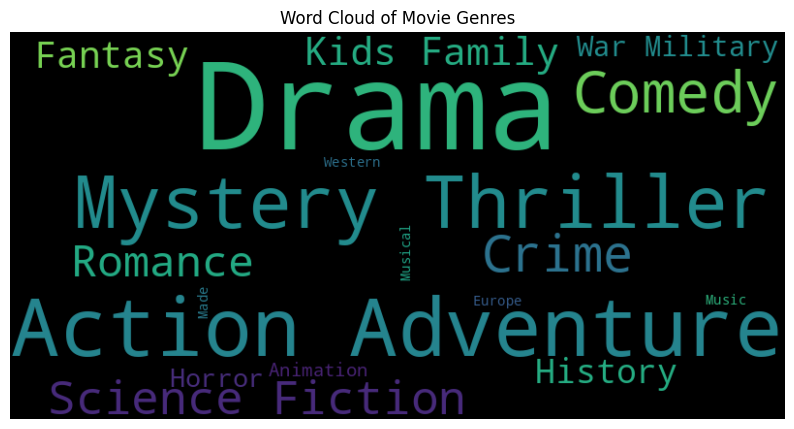

In [158]:
#Showing Top Genres in Movie using Word Cloud

#import all necessary Labraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extracting genres and joining them into a single string
all_genres_text = ', '.join(movie_df['Genre'].fillna('').values)

# Creating a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='Black').generate(all_genres_text)

# Displaying the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Genres')
plt.show()

### So we have **Drama,Action Adventure, Mystery Thriller,Comedy,Science Fiction, Crime** as some of the top Genres in Movies

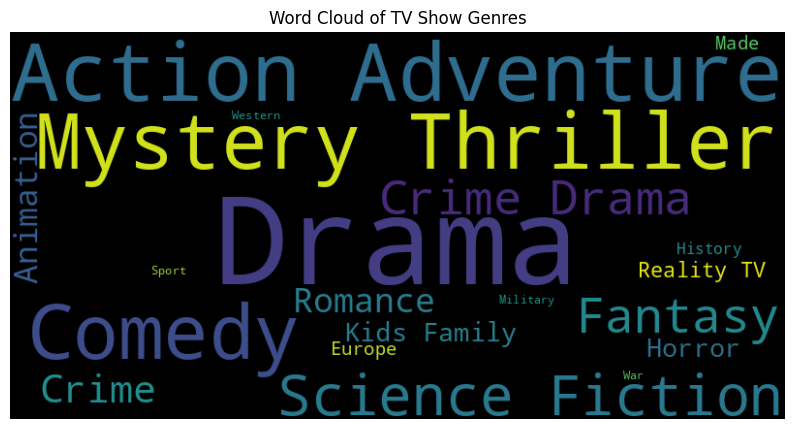

In [159]:
#Showing Top Genres in TV show using Word Cloud

# Extracting genres and joining them into a single string
all_genres_text = ', '.join(tvshow_df['Genre'].fillna('').values)

# Creating a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='Black').generate(all_genres_text)

# Displaying the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of TV Show Genres')
plt.show()

## In Tv Shows also we can see that **Drame, Action Adventure, Mystery Thriller, Crime Drama, Comedy, Science Fiction** are top

## **Finding Predominant Streaming Service**

In [160]:
#finding Predominant Streaming Service in Movies
movie_df['Streaming_service'].value_counts()

Apple TV              31
NA                    26
Amazon Prime Video    15
Netflix               13
Hotstar                4
Zee5                   3
Apple TV Plus          2
Lionsgate Play         2
Sony Liv               2
Amazon Video           1
Voot                   1
Name: Streaming_service, dtype: int64

**Apple TV** is predominant Streaming service followed by **Amazon Prime Video** and **Netflix** in Movies

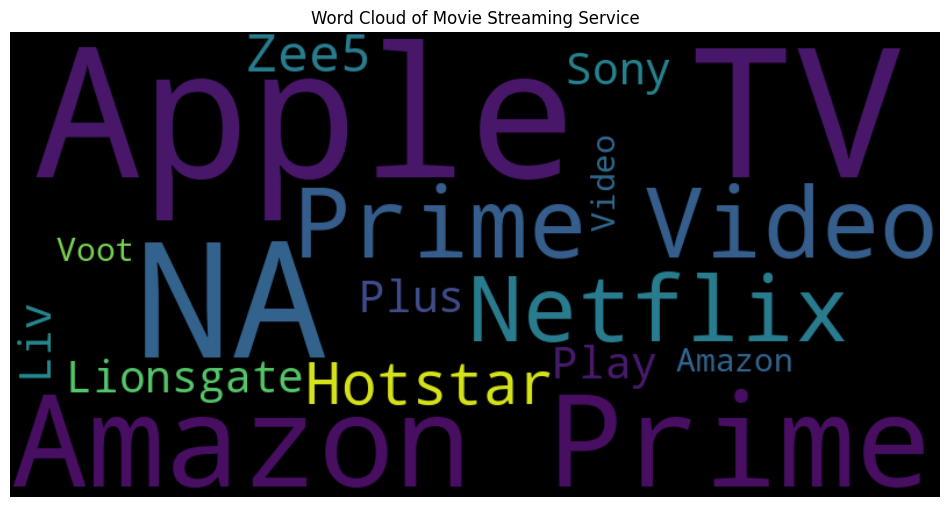

In [161]:
#Let's Visvalize it using word cloud

# Extracting streaming service and joining them into a single string
all_streaming_text = ', '.join(movie_df['Streaming_service'].fillna('').values)

# Creating a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='Black').generate(all_streaming_text)

# Displaying the WordCloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Streaming Service')
plt.show()

In [162]:
#finding Predominant Streaming Service in Tv shows
tvshow_df['Streaming_service'].value_counts()

Netflix               30
Amazon Prime Video    17
Hotstar               13
Sony Liv               8
NA                     8
Jio Cinema             7
Crunchyroll            6
Apple TV Plus          3
Voot                   2
MX Player              2
Lionsgate Play         2
Alt Balaji             1
Amazon miniTV          1
Name: Streaming_service, dtype: int64

## **Task 3 :- Data Export**

In [164]:
#saving final dataframe as Final Data in csv format
final_df.to_csv('Final Data.csv',index=False)

In [165]:
#saving filter data as Filter Data in csv format
filter_data.to_csv('Filtered Data.csv',index=False)

##**Summary and Technical document**

I Extracted data from https://www.justwatch.com website, fetched top rated movies  and tvshows.
There are 200 recorda and 10 columns in final dataset.100 records and 10 columns in movies dataset and 100 records and 10 columns in rvshows dataset.
All movies 2022 to till now feched from final dataset in the filter dataset and all movies and tvshows which rating is greater than and equal to 7.

 My last knowledge update in January 2022, I don't have real-time data, including the current top-rated movies on IMDb. IMDb ratings can change over time as more users contribute their reviews and ratings.

However, I can guide you on how to find this information and provide a general template for a summary and technical document of a movie:


To find the latest IMDb ratings and information for the top-rated movies, please visit the IMDb website or use their API if available. Keep in mind that IMDb ratings are subject to change as more users contribute their opinions.